In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('trainlinearregression.csv')
data

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000
...,...,...,...,...,...,...,...,...,...,...,...
1163,6,1400,2,440,672,672,1,6,1978,1978,149500
1164,7,1472,2,402,384,802,2,7,1991,1992,160000
1165,5,789,1,250,789,789,1,5,1948,1950,115000
1166,6,1661,1,377,992,1661,1,8,1955,1996,165500


In [3]:
x_train=data.drop('SalePrice',axis=1)
y_train=data['SalePrice']
x_train=np.array(x_train)
y_train=np.array(y_train)


In [4]:
test_data=pd.read_csv('testlinear.csv')
test_data

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,8,1970,3,753,1085,1120,2,8,2006,2006,281000
1,6,1632,1,338,1240,1632,2,6,1958,1988,139000
2,7,1223,2,480,600,520,2,4,2005,2005,147400
3,5,1559,2,812,1559,1559,1,5,1948,1973,153500
4,4,630,1,286,630,630,1,3,1970,2002,86000
...,...,...,...,...,...,...,...,...,...,...,...
287,6,1158,2,576,1158,1158,1,5,2004,2004,158000
288,6,987,1,264,483,483,1,5,1972,2007,118000
289,6,848,2,420,848,848,1,4,2003,2003,140000
290,7,1266,2,388,1266,1266,2,6,2007,2007,159895


In [5]:
x_test=data.drop('SalePrice',axis=1)
y_test=data['SalePrice']
x_features=['OverallQual','GrLivingArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','SalePrice']
x_test=np.array(x_test)
y_test=np.array(y_test)

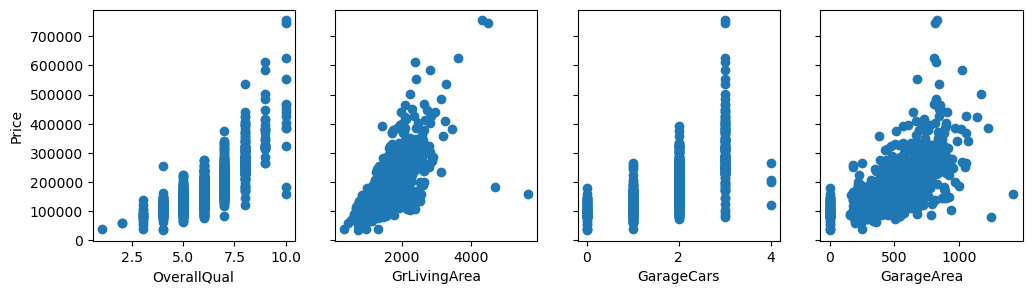

In [7]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("Price")
plt.show()

In [8]:
#feature scaling
mu=np.mean(x_train,axis=0)
sd=np.std(x_train,axis=0)
x_norm=(x_train-mu)/sd

In [9]:
def cost_function(X, y, w, b): 
    m = X.shape[0]
    cost = 0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           
        cost = cost + (f_wb_i - y[i])**2      
    cost = cost / (2 * m)                    
    return cost

In [10]:
def compute_gradient(x,y,w,b):
 m,n=x.shape #m-rows-examples, n-columns-categories
 dj_db=0
 dj_dw=np.zeros((n,))
 for i in range(m):                             
        err = (np.dot(x[i], w) + b) - y[i]   # error for the i th example
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * x[i, j]    
        dj_db = dj_db + err                        
 dj_dw = dj_dw / m                                
 dj_db = dj_db / m                                
        
 return dj_db, dj_dw

In [11]:
def gradient_descent(x, y, w_in, b_in, a, num_iters):
    J_histo= []
    wt =w_in
    b = b_in
    
    for i in range(num_iters):
        dj_db,dj_dw = compute_gradient(x, y, wt, b)  
        wt = wt - a * dj_dw   # Update Parameters           
        b = b - a * dj_db              
        if i<100000:
         J_histo.append( cost_function(x, y, wt, b)) 

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i}: Cost {J_histo[-1]}   ")
        
    return wt, b, J_histo

In [14]:
r,c=x_train.shape
initial_w = np.zeros(c)
initial_b = 0
iterations = 1000
alpha = 0.0001
w_final, b_final, J_hist = gradient_descent(x_norm, y_train, initial_w, initial_b, alpha, iterations)
print(f"b,w found by gradient descent: {b_final},{w_final} ")

for i in range(r):
    print(f"prediction: {np.dot(x_test[i], w_final) + b_final}, target value: {y_test[i]}")

Iteration 0: Cost 19603233531.850216   
Iteration 100: Cost 19048062083.104717   
Iteration 200: Cost 18522183531.504597   
Iteration 300: Cost 18023191295.212887   
Iteration 400: Cost 17548908672.031025   
Iteration 500: Cost 17097366108.135365   
Iteration 600: Cost 16666780730.53854   
Iteration 700: Cost 16255537917.520472   
Iteration 800: Cost 15862174703.792969   
Iteration 900: Cost 15485364837.437225   
b,w found by gradient descent: 17246.524832412306,[5028.07721439 4482.93122634 3947.60587848 3943.53428307 3793.20756226
 3737.4610402  3385.39362727 3294.66189074 3233.20823883 3086.40541119] 
prediction: 29563692.542473085, target value: 184000
prediction: 27618878.638652705, target value: 164000
prediction: 27267798.620887555, target value: 130000
prediction: 46940493.19011864, target value: 555000
prediction: 29275242.71918948, target value: 176000
prediction: 29195890.099778764, target value: 98600
prediction: 28725980.410848886, target value: 181000
prediction: 25678156.

ValueError: x and y must be the same size

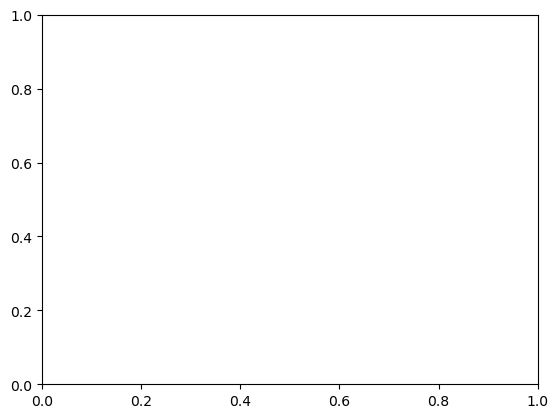

In [18]:
plt.scatter(x_test,y_test)
plt.plt(x_test,np.dot(x_test, w_final) + b_final)
plt.show()